In [1]:
import numpy as np
import uproot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import scipy.stats as ss
from scipy.optimize import curve_fit
from scipy.stats import norm
from ntuple_lib import *
beautify_plots(plt)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import matplotlib as mpl
plt.rcParams["figure.figsize"] = (12, 8)

c:\Users\thoma\anaconda3\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [16]:
def computeLocal2DPUDensity(all_events_vertex_zs, all_events_vertex_ts, delta_z, delta_t):
    localPUdensity = []
    for vertex_zs, vertex_ts in zip(all_events_vertex_zs, all_events_vertex_ts):
        
        HS_z = vertex_zs[0]
        HS_t = vertex_ts[0]

        PU_zs = vertex_zs[1:]
        PU_ts = vertex_ts[1:]

        n_local_vtxs = np.sum(np.logical_and(np.abs(HS_z - PU_zs) < delta_z, np.abs(HS_t - PU_ts) < delta_t))
        area = 2*delta_z * 2*delta_t
        localPUdensity.append(n_local_vtxs/area)
    return localPUdensity

In [3]:
# files = ['ntuples_condor/OutDir_{}/hist-Rel21sample.root'.format(i) for i in range(1, 10)]
files = ['../ntuples/ttbar/OutDir_{}/hist-Rel21sample.root'.format(i) for i in range(3, 31)]
truth_vertex_z = np.array([], dtype='object')
truth_vertex_t = np.array([], dtype='object')
for file in files:
    root_file = uproot.open(file)
    for key in root_file.keys():
        if key.startswith('EventTree'):
            tree = root_file[key]
            truth_vertex_z = np.concatenate((truth_vertex_z, tree['truthvertex_z'].array(library='np')))
            truth_vertex_t = np.concatenate((truth_vertex_t, tree['truthvertex_t'].array(library='np')))

In [52]:
delta_z1 = 2
delta_z2 = 1
delta_t1 = 0.100
delta_t2 = 0.050
delta_t3 = 0.020
delta_t4 = 0.008

PU2D_1 = np.array(computeLocal2DPUDensity(truth_vertex_z, truth_vertex_t, delta_z1, delta_t1))*2*delta_z1*2*delta_t1
PU2D_2 = np.array(computeLocal2DPUDensity(truth_vertex_z, truth_vertex_t, delta_z1, delta_t2))*2*delta_z1*2*delta_t2
PU2D_3 = np.array(computeLocal2DPUDensity(truth_vertex_z, truth_vertex_t, delta_z1, delta_t3))*2*delta_z1*2*delta_t3

PU2D_4 = np.array(computeLocal2DPUDensity(truth_vertex_z, truth_vertex_t, delta_z1, delta_t4))*2*delta_z1*2*delta_t4

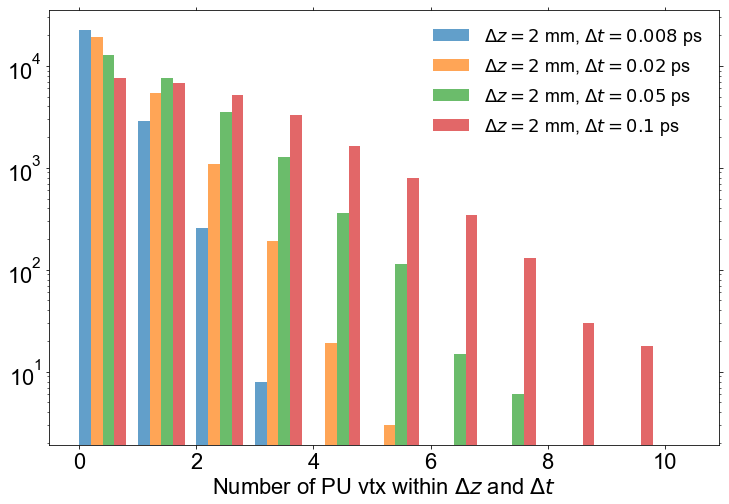

In [53]:
bins = np.arange(0, 10, 0.2)

_ = plt.hist(PU2D_4,     bins=bins, label='$\Delta z = 2$ mm, $\Delta t = {}$ ps'.format(delta_t4), alpha = 0.7)
_ = plt.hist(PU2D_3+0.2, bins=bins+0.2, label='$\Delta z = 2$ mm, $\Delta t = {}$ ps'.format(delta_t3), alpha = 0.7)
_ = plt.hist(PU2D_2+0.4, bins=bins+0.4, label='$\Delta z = 2$ mm, $\Delta t = {}$ ps'.format(delta_t2), alpha = 0.7)
_ = plt.hist(PU2D_1+0.6, bins=bins+0.6, label='$\Delta z = 2$ mm, $\Delta t = {}$ ps'.format(delta_t1), alpha = 0.7)

plt.xlabel('Number of PU vtx within $\Delta z$ and $\Delta t$')
plt.yscale('log')
plt.legend(frameon=False)